In [ ]:
'''
article = https://towardsdatascience.com/image-detection-from-scratch-in-keras-f314872006c9
'''

In [46]:
import cv2
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import os
import random
import gc

In [47]:
train_dir = 'Resources/DOGCAT/train'
test_dir = 'Resources/DOGCAT/test'

train_dogs = [f'{train_dir}/{i}' for i in os.listdir(train_dir) if 'dog' in i]
train_cats = [f'{train_dir}/{i}' for i in os.listdir(train_dir) if 'cat' in i]

test_imgs = [f'{train_dir}/{i}' for i in os.listdir(train_dir)]

train_imgs = train_dogs[:2000] + train_cats[:2000]
random.shuffle(train_imgs)

del train_dogs
del train_cats
gc.collect()

63

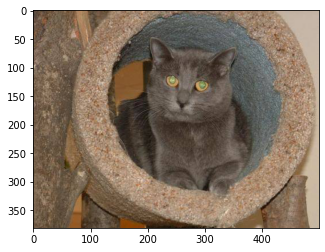

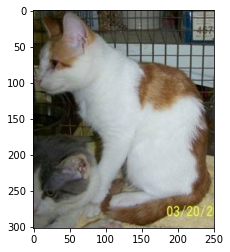

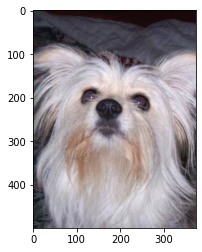

In [48]:
import matplotlib.image as mpimg
for ima in train_imgs[:3]:
    img = mpimg.imread(ima)
    imgplot = plt.imshow(img)
    plt.show()

In [49]:
nrows = 150
ncolumns = 150
channels = 3 #change to 1 for grayscale

def read_and_process_image(list_of_images):
    #returns two lists, X => array of resized images, y => array of labels
    X = []
    y = []
    
    for image in list_of_images:
        X.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (nrows, ncolumns), interpolation = cv2.INTER_CUBIC))
        
        if 'dog' in image:
            y.append(1)
        elif 'cat' in image:
            y.append(0)
            
    return X, y

In [50]:
X, y = read_and_process_image(train_imgs)

In [51]:
X[0]

array([[[ 59,  65,  89],
        [ 68,  79, 101],
        [ 53,  67,  87],
        ...,
        [164, 179, 195],
        [164, 179, 195],
        [161, 180, 195]],

       [[ 62,  69,  88],
        [ 62,  74,  92],
        [ 61,  75,  95],
        ...,
        [165, 180, 196],
        [165, 180, 196],
        [163, 181, 196]],

       [[ 58,  67,  80],
        [ 65,  78,  94],
        [ 58,  72,  94],
        ...,
        [166, 181, 197],
        [166, 181, 197],
        [166, 181, 197]],

       ...,

       [[ 60,  81, 103],
        [ 52,  73,  95],
        [ 75,  96, 118],
        ...,
        [164, 185, 200],
        [162, 183, 195],
        [161, 184, 200]],

       [[ 62,  83, 105],
        [ 66,  87, 109],
        [ 62,  83, 105],
        ...,
        [161, 182, 196],
        [165, 186, 198],
        [159, 182, 198]],

       [[ 55,  76,  98],
        [ 81, 102, 124],
        [ 74,  95, 117],
        ...,
        [162, 183, 198],
        [163, 183, 195],
        [159, 182, 198]]

Text(0.5, 1.0, 'Labels for Cats and Dogs')

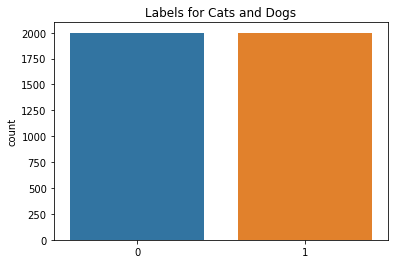

In [52]:
import seaborn as sns
del train_imgs
gc.collect()

X = np.array(X)
y = np.array(y)

sns.countplot(y)
plt.title('Labels for Cats and Dogs')

In [53]:
print('X shape: ', X.shape)
print('y shape: ', y.shape)

X shape:  (4000, 150, 150, 3)
y shape:  (4000,)


In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (3200, 150, 150, 3)
y_train shape:  (3200,)
X_test shape:  (800, 150, 150, 3)
y_test shape:  (800,)


In [55]:
del X, y
gc.collect()

ntrain = len(X_train)
ntest = len(X_test)

batch_size = 32

In [56]:
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img

In [57]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units = 512, activation = 'relu'))
model.add(layers.Dense(units = 1, activation = 'sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [58]:
model.compile(loss = 'binary_crossentropy', optimizer = optimizers.RMSprop(lr = 1e-4),metrics = ['acc'])

In [59]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range = 40,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

val_datagen = ImageDataGenerator(rescale = 1./255)

In [60]:
train_generator = train_datagen.flow(X_train, y_train, batch_size = batch_size)
val_generator = val_datagen.flow(X_test, y_test, batch_size = batch_size)

In [64]:
history = model.fit_generator(train_generator,
                             steps_per_epoch = ntrain // batch_size,
                             epochs = 10,
                             validation_data = val_generator,
                             validation_steps = ntest // batch_size)

Epoch 1/10
100/100 [==============================] - 121s 1s/step - loss: 0.4656 - acc: 0.7841 - val_loss: 0.4604 - val_acc: 0.7900
Epoch 2/10
100/100 [==============================] - 109s 1s/step - loss: 0.4628 - acc: 0.7800 - val_loss: 0.4543 - val_acc: 0.7900
Epoch 3/10
100/100 [==============================] - 89s 892ms/step - loss: 0.4734 - acc: 0.7759 - val_loss: 0.4501 - val_acc: 0.7875
Epoch 4/10
100/100 [==============================] - 90s 899ms/step - loss: 0.4646 - acc: 0.7816 - val_loss: 0.4615 - val_acc: 0.7862
Epoch 5/10
100/100 [==============================] - 94s 940ms/step - loss: 0.4723 - acc: 0.7700 - val_loss: 0.4323 - val_acc: 0.7987
Epoch 6/10
100/100 [==============================] - 96s 960ms/step - loss: 0.4551 - acc: 0.7859 - val_loss: 0.4527 - val_acc: 0.7975
Epoch 7/10
100/100 [==============================] - 99s 986ms/step - loss: 0.4666 - acc: 0.7794 - val_loss: 0.4545 - val_acc: 0.7788
Epoch 8/10
100/100 [==============================] - 105s 

In [63]:
model.save_weights('model_weights.h5')
model.save('model_keras.h5')

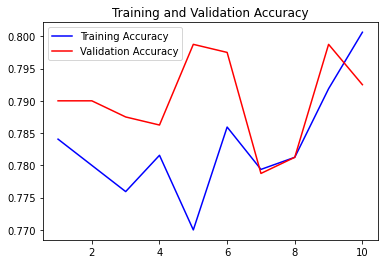

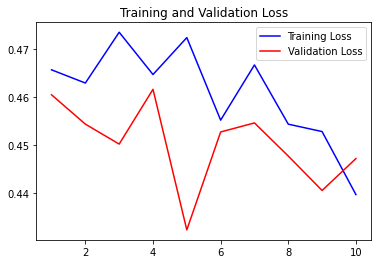

In [65]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'b', label = 'Training Loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [66]:
X_test, y_test = read_and_process_image(test_imgs[:10])
x = np.array(X_test)
test_datagen = ImageDataGenerator(rescale = 1./255)

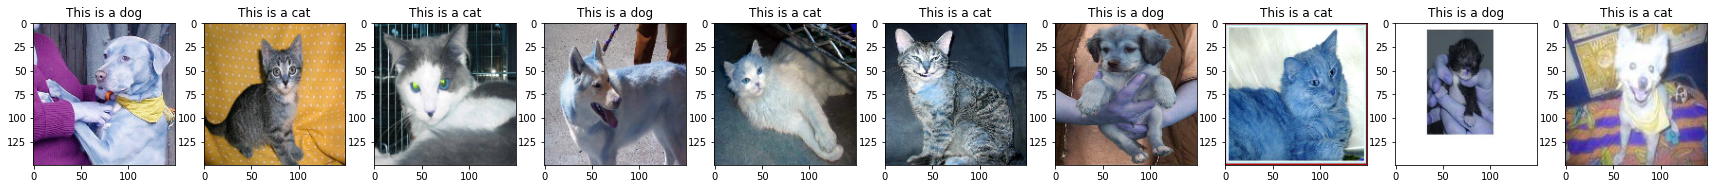

In [74]:
i = 0
text_labels = []
plt.figure(figsize = (30,20))
for batch in test_datagen.flow(x, batch_size = 1):
    columns = len(test_datagen.flow(x, batch_size = 1))
    pred = model.predict(batch)
    if pred > 0.5:
        text_labels.append('dog')
    else:
        text_labels.append('cat')
    plt.subplot(5 / columns + 1, columns, i + 1)
    label_i = text_labels[i]
    title = f'This is a {label_i}'
    plt.title(title)
    imgplot = plt.imshow(batch[0])
    i += 1
    if i % 10 == 0:
        break
plt.show()